### Übung1- UCR Time Series Analysis(FordA)
Name：Yiling Li <br>
Matrikelnummer：108980 <br>
Python-Version：3.10 <br>
Datensatz：FordA von UCR Time Series Classification Archive <br>

### 1. Data Loading:
Laden Sie den gewählten Datensatz in Python ein.

In [ ]:
import numpy as np
import pandas as pd

train_path = r"/Users/liyiling/Documents/Albstadt学习/2025WW/Python-Advanced-Herr Seidler/Übung1_Yiling Li/FordA/FordA_TRAIN.tsv"
test_path  = r"/Users/liyiling/Documents/Albstadt学习/2025WW/Python-Advanced-Herr Seidler/Übung1_Yiling Li/FordA/FordA_TEST.tsv"

def load_ucr_data(file_path):
    data = []
    labels = []
    with open(file_path, "r") as f:
        for line in f:
            parts = line.strip().split()
            labels.append(float(parts[0]))
            values = [float(x) for x in parts[1:]]
            data.append(values)
    return np.array(data), np.array(labels)

X_train, y_train = load_ucr_data(train_path)
X_test, y_test   = load_ucr_data(test_path)

### 2. Data Unterstanding:  <br>
Stellen Sie die wesentlichen Charakteristiken des Datensatzes dar
(z.B. Anzahl Samples, Abtastrate, Klassen, …)

In [ ]:
# Anzahl der Trainingsproben
X_train.shape


In [ ]:
# Anzahl der Testproben
X_test.shape

In [ ]:
# Abtastrate (Anzahl der Merkmale pro Probe)
num_features = X_train.shape[1]
num_features

In [ ]:
# Klassen im Datensatz
unique_classes = np.unique(y_train)
unique_classes

In [ ]:
# die Menge NaN-Werte
num_nan_train = np.isnan(X_train).sum()
num_nan_train

In [68]:
# Mittelwert und Standardabweichung der Trainingsdaten
mean_train = np.mean(X_train)
std_train  = np.std(X_train)
print(f"Mittelwert der Trainingsdaten: {mean_train}")
print(f"Standardabweichung der Trainingsdaten: {std_train}")

Mittelwert der Trainingsdaten: -2.32319530773935e-11
Standardabweichung der Trainingsdaten: 0.9989994995183201


### 3. Data Exploration:
- Machen Sie sich mit dem Datensatz vertraut (z.B. Zielgrößen, Anzahl Missing Values).
- Erstellen Sie Grafiken, um den Datensatz besser zu verstehen (z.B. Ausreißer, Rauschen).
- Fassen Sie Ihre Erkenntnisse für die nachfolgenden Phasen zusammen.

In [ ]:
# Zielgrößen
unique_classes, unique_class_counts = np.unique(y_train, return_counts=True)
print(f"Klassen sind: {unique_classes} ")
print(f"Verteilung sind: {unique_class_counts}")

In [ ]:
# Anzahl Missing Values
num_nan_train = np.isnan(X_train).sum()
num_nan_test  = np.isnan(X_test).sum()
print(f"Anzahl der NaN-Werte im Trainingssatz: {num_nan_train}")
print(f"Anzahl der NaN-Werte im Testsatz: {num_nan_test}")

In [ ]:
# Grafiken zur Visualisierung einiger Zeitreihen
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.plot(X_train[i], label=f'Train Sample {i+1} - Class {y_train[i]}')
plt.title('Zeitreihen aus dem Trainingssatz')
plt.xlabel('Zeit')
plt.ylabel('Wert')
plt.legend()
plt.show()

Anzahl potenzieller Ausreißer in diesem Sample: 0
Geschätztes Rauscheniveau (Median der rollenden Std): 0.5864075878880213


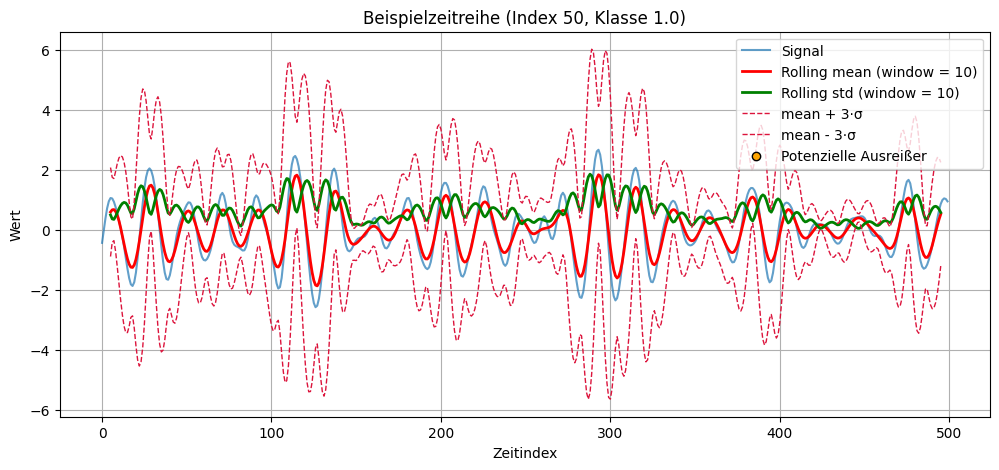

In [64]:
# Ausreißer und Rauschen
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def visualisierung (X, y, sample_idx,window):
    signal = X[sample_idx]
    label  = y[sample_idx]

    df = pd.DataFrame({"signal": signal})
    df["rolling_mean"] = df["signal"].rolling(window=window, center=True).mean()
    df["rolling_std"]  = df["signal"].rolling(window=window, center=True).std()

    df["upper"] = df["rolling_mean"] + 3 * df["rolling_std"]
    df["lower"] = df["rolling_mean"] - 3 * df["rolling_std"]

    # Ausreißer identifizieren
    ausreißer_mask = (df["signal"] > df["upper"]) | (df["signal"] < df["lower"])
    ausreißer_idx = np.where(ausreißer_mask)[0]
    num_ausreißer = len(ausreißer_idx)
    print(f"Anzahl potenzieller Ausreißer in diesem Sample: {num_ausreißer}")

    # Rauscheniveau schätzen
    rauschen_niveau = df["rolling_std"].median()
    print(f"Geschätztes Rauscheniveau (Median der rollenden Std): {rauschen_niveau}")

    fig, ax = plt.subplots(figsize=(12, 5))

    ax.plot(df["signal"], label="Signal", alpha=0.7)
    ax.plot(df["rolling_mean"], color="red", linewidth=2,
            label=f"Rolling mean (window = {window})")
    ax.plot(df["rolling_std"], color="green", linewidth=2 ,
            label=f"Rolling std (window = {window})")
    ax.plot(df["upper"], "--", color="crimson", linewidth=1, label="mean + 3·σ")
    ax.plot(df["lower"], "--", color="crimson", linewidth=1, label="mean - 3·σ")

    # Ausreißer
    ax.scatter(ausreißer_idx, df["signal"].iloc[ausreißer_idx],
               color="orange", edgecolors="black",
               label="Potenzielle Ausreißer", zorder=5)

    ax.set_title(f"Beispielzeitreihe (Index {sample_idx}, Klasse {label})")
    ax.set_xlabel("Zeitindex")
    ax.set_ylabel("Wert")
    ax.grid(True)
    ax.legend()
    plt.show()
# Beispielaufrufe der Visualisierungsfunktion
visualisierung(X_train, y_train, sample_idx=50, window=10)


### Zusammenfassung der Erkenntnisse aus der Data Exploration Phase:
#### 1. Grundlegendes Verständnis des Datensatzes
- Der Datensatz enthält zwei Zielklassen: -1 und 1.
- Die Trainingsdaten umfassen 3601 Samples, die Testdaten 1320 Samples.
- Jede Zeitreihe besteht aus 500 Messpunkten eines Motorsensors.
- Es wurden keine fehlenden Werte (NaN) festgestellt.
- Die Klassenverteilung ist leicht unausgeglichen, aber akzeptabel-– 1 (1846 Samples) und Klasse 1 (1755 Samples) nahezu gleich häufig auftreten.
- Standardabweichung ist fast 1 (0.998), Mittelwert nahe 0 (-0.0007), Skalierung der Daten ist somit relativ gut. muss nicht mehr skaliert werden.

#### 2. Visuelle Analyse der Zeitreihen
Zur besseren Einschätzung der Rohdaten wurden mehrere Zeitreihen visualisiert:
- Die Zeitreihen zeigen deutliches Rauschen und starke Schwankungen.
- Ein klarer Trend ist nicht erkennbar, da die geglättete Rolling-Mean-Kurve weitgehend horizontal verläuft und keine anhaltende Auf- oder Abwärtsbewegung zeigt.
- In den visualisierten Beispielen sind keine starken globalen Ausreißer sichtbar.
- Die beiden Klassen weisen ähnliche Grundstrukturen auf, was nahelegt, dass eine reine visuelle Trennung schwierig ist.
    - glättete Trendlinie (rolling mean)
    - hohe lokale Varianz (rolling std) → Hinweis auf Rauschen
    - Nur sehr wenige bzw. keine Punkte außerhalb von mean ± 3σ → kaum klassische Ausreißer

Unterschiede zwischen den Klassen
Obwohl die beiden Klassen (-1 und 1) leichte Unterschiede in Amplitude und lokaler Varianz aufweisen (z.B. etwas stärkere Schwankungen bei Klasse -1), sind diese Unterschiede visuell nur sehr schwer erkennbar. Wenn index 50 (Klasse 1) mit index 55 (Klasse -1) verglichen wird, sind die Unterschiede minimal und nicht eindeutig.
Daher eignet sich eine reine visuelle Analyse nicht zur Klassentrennung, und es werden Feature-Extraktionsmethoden benötigt, um die feinen Unterschiede systematisch zu erfassen.

#### 3. Erkenntnisse für die weiteren Phasen
- Die Rohdaten sind stark verrauscht; eine direkte Modellierung der Zeitreihen ist daher wenig geeignet.
- Es wurden keine klassischen Ausreißer gefunden, sodass keine Ausreißerbehandlung notwendig ist.
- Die Klassen unterscheiden sich visuell kaum, weshalb eine reine Betrachtung der Rohsignale nicht zur Klassifikation ausreicht.
- Für die nächsten Schritte wird eine Merkmalsextraktion (z. B. TSFEL, tsfresh, Catch22) empfohlen.
- Eine Standardisierung sowie optional leichte Filterung verbessern die Datenqualität für die Modellierung.

### 4. Data Preprocessing:
+ Bereiten Sie den Datensatz gemäß Ihren Erkenntnissen aus der Data Exploration
Phase für die Modellierung vor.
+ Stellen Sie dar, welche Vorverarbeitungsschritte Sie durchführen.
    - Signalbegrenzung:
    Keine Begrenzung notwendig, da alle Zeitreihen bereits eine einheitliche Länge von 500 Messpunkten haben und keine irrelevanten Anfangs- oder Endsegmente erkennbar sind.
    - Ausreißerbehandlung:
    Keine Ausreißerbehandlung notwendig, da keine signifikanten Ausreißer im Datensatz identifiziert wurden.
    - Rauschreduktion
    Die Signale sind zwar stark verrauscht, jedoch wird in diesem Projekt keine zusätzliche Glättung (z. B. Filterung) angewendet, um die ursprüngliche Signalstruktur für die Merkmalsextraktion zu erhalten.
    - Standardisierung:
    Trotzdem die Standardabweichung der Traindaten fast 1 ist und die Mittelwerte fast 0 ist, ist Standardisierung nicht benötigt.
    Die Zeitreihen werden mittels z-Score (StandardScaler) skaliert, um die Eingabedaten für ML-Modelle wie SVM und MLP zu normalisieren.
    - Fensterung:
    Es wird keine zusätzliche Fensterung durchgeführt, da jede Zeitreihe als ein kompletter Beobachtungszeitraum behandelt und als Ganzes beschrieben wird.

-2.32319530773935e-11 0.9989994995183201
2.9849306401585436e-18 0.9999999999999998
Anzahl potenzieller Ausreißer in diesem Sample: 0
Geschätztes Rauscheniveau (Median der rollenden Std): 0.5870907195344239


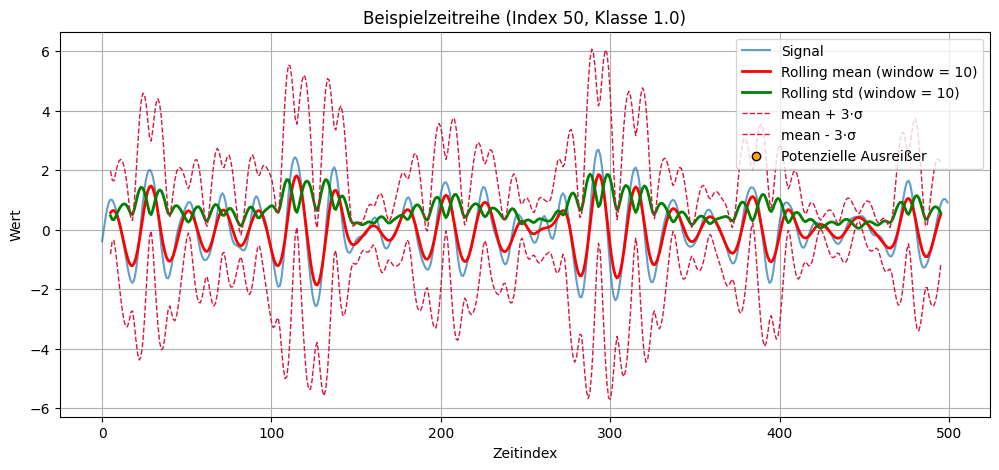

In [67]:
# Scalierung der Daten mit StandardScaler (nicht benötigt)
from sklearn.preprocessing import StandardScaler
# from tslearn.preprocessing import TimeSeriesScalerMeanVariance

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print(X_train.mean(), X_train.std())
print(X_train_scaled.mean(), X_train_scaled.std())

visualisierung(X_train_scaled,y_train,sample_idx=50,window=10)


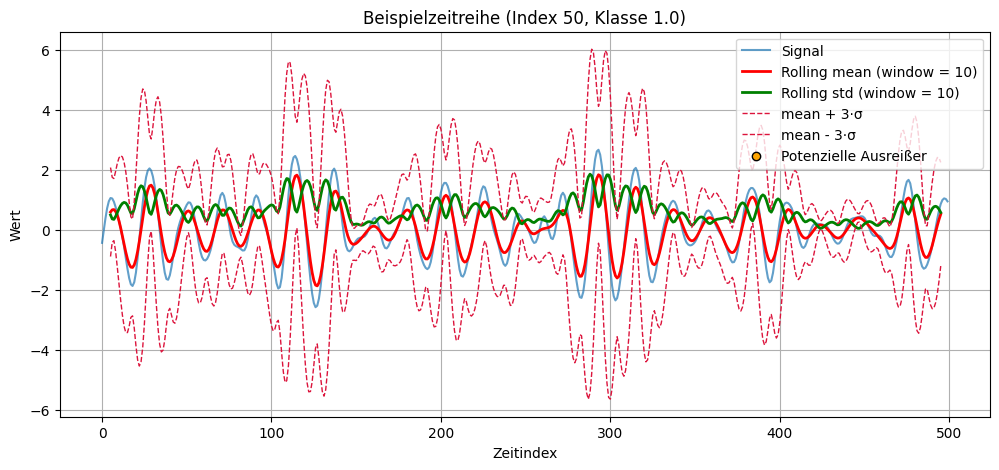